EMPLOYEE SALARIES FOR DIFFERENT JOB ROLES
https://www.kaggle.com/datasets/inductiveanks/employee-salaries-for-different-job-roles


<span style="font-size:15px">

# About Dataset
Welcome to the Employee Salaries for Different Job Roles Dataset! This dataset provides valuable insights into the compensation and job roles of employees across various industries and regions. Whether you're an HR analyst, data scientist, or someone interested in understanding salary trends, this dataset offers a wealth of information to explore and analyze.

## Content:

The dataset contains the following fields:

work_year: The year of employment.

experience_level: The experience level of the employee (e.g., entry-level, mid-level, senior).

employment_type: The type of employment (e.g., full-time, part-time, contract).

job_title: The job title or position of the employee within the company.

salary: The salary amount in the local currency.

salary_currency: The currency in which the salary is denoted.

salary_in_usd: The equivalent salary amount in USD (United States Dollars).

employee_residence: The location of the employee's residence.

remote_ratio: The percentage of remote work allowed for the position.

company_location: The location of the company.

company_size: The size of the company (e.g., small, medium, large).

## Usage:

This dataset can be utilized for various purposes, including but not limited to:

Analyzing salary trends across different job titles and experience levels.
Investigating the impact of remote work on compensation.
Comparing salary levels between full-time and part-time employment.
Understanding the correlation between company size and employee salaries.
Predictive analysis for forecasting salaries based on experience and job roles.
We encourage you to explore the data, perform insightful analyses, and share your findings with the Kaggle community. If you find any interesting patterns or make significant discoveries, don't forget to acknowledge this dataset in your work.

Please note that all data has been anonymized to ensure the privacy and confidentiality of individuals and organizations.

We hope you find this dataset valuable for your research and analysis. Happy exploring!
</span>

## Load the Data
Virtual Environment copied from homl3

In [1]:
# Only run if NOT unziped
# from zipfile import ZipFile
# with ZipFile('archive.zip', 'r') as f:
#     f.extractall()

## Explore the Data

In [2]:
import pandas as pd

salary = pd.read_csv('ds_salaries.csv')
# salary.columns.values[0] = "index" #names the first column index
# added in csv file instead
salary.head()

,index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
# extra code – code to save the figures as high-res PNGs
# imported from homl3 textbook
from pathlib import Path
import matplotlib.pyplot as plt

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

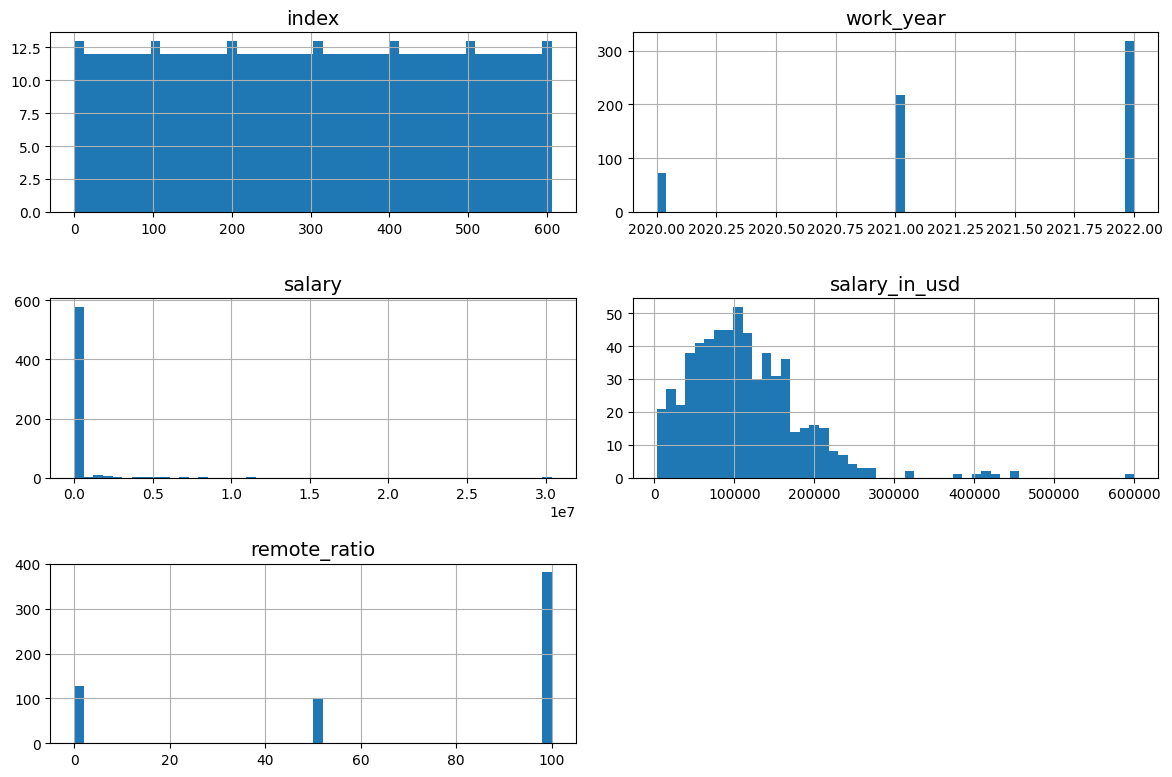

In [4]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

salary.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

2 Numerical Variables
    Salary in USD
    Years Worked

5 Categorical Variables
    Experience Level (Ordinal)
    Employment Type  (One Hot)
    Job Title (One Hot)
    Company Size (Ordinal)
    Remote Ratio (Ordinal)

The other columns are somewhat redundant OR should be done in cluster means capacity. Which will be done later. 
(Starting with a simpler model)

    

Use this to check certain variables

In [5]:
salary["company_size"].value_counts()

company_size
M    326
L    198
S     83
Name: count, dtype: int64

## Create a Test Set
We will do this by using the Scikit-learn train_test_split method

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(salary, test_size=0.2, random_state=42)


## Data Cleaning
1. work_year - needs to be a value that denotes how many years from the current one (__DONE__)
2. experience_level - convert to a dummy variable ordinally (experience matters)
3. employement_type - convert to a dummy variable categorically (FT, PT, contract treat as equal?)
4. job_title - can be used as a cluster variable
5. salary - // 
6. salary_currency - //
7. salary_in_usd - THIS IS THE OUTCOME (I want to get a model that will predict salary in USD given the other things)
8. employee_residence - Another cluster variable
9. remote ratio - convert to a dummy variable categorically
10. company location - Cluster Variable (maybe doesnt matter?)
11. company_size - categorical variable


# First Check Null Rows

In [7]:
null_rows_index = salary.isnull().any(axis=1)
salary.loc[null_rows_index].head() #NO NULLS YAY

,index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


# Number Variables
1. Years Worked
7. Salary in USD
Create a variable that measures years since the start date
Salary is tailed so needs to be log scaled and then standardized

In [52]:
#Functions to include in pipeline
import datetime
def years_worked(df):
    today = datetime.date.today()
    year = today.year
    df["work_year"] = year - df["work_year"] # years worked variable
    return df

def years_worked_name(function_transformer, feature_names_in):
    return ["work_year"]


# Number Pipeline

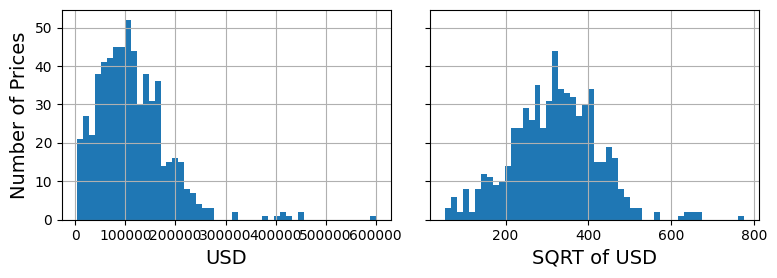

In [9]:
# Code that helps visualize Salary and SQRT of Salary
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
salary["salary_in_usd"].hist(ax=axs[0], bins=50)
salary["salary_in_usd"].apply(np.sqrt).hist(ax=axs[1], bins=50) #log did not solve
axs[0].set_xlabel("USD")
axs[1].set_xlabel("SQRT of USD")
axs[0].set_ylabel("Number of Prices")
save_fig("long_tail_plot")
plt.show()

In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

years_pipeline = make_pipeline(
    FunctionTransformer(years_worked, feature_names_out=years_worked_name),
    StandardScaler())


sqrt_pipeline = make_pipeline(
    FunctionTransformer(np.sqrt, feature_names_out= "one-to-one"),
    StandardScaler())
sqrt_pipeline

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(feature_names_out='one-to-one',
                                     func=<ufunc 'sqrt'>)),
                ('standardscaler', StandardScaler())])

# Categorical Variables
2. Experience Level (Ordinal)
3. Employment Type  (One Hot)
4. Job Title (One Hot)
11. Company Size (Ordinal)
9. Remote Ratio (Ordinal)


Categorize the Variables using Ordinal or One-Hot-Encoder 
We will use Scikit-learn's OrdinalEncoder and OneHotEncoder imports
One Hot vars can be generalized
Ordinal Variables need to be ordered by category

# Categorical Variable Pipelines

In [11]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Test a few encoding techniques
remote_ratio_cat = salary[["remote_ratio"]]
one_hot_encoder = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()
remote_encode = ordinal_encoder.fit_transform(remote_ratio_cat) # This works

# Preprocessing

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
# i dont need to make a pipeline for one step. just include in column transformer
# For number vars I do

columns_used = ["work_year", "salary_in_usd", "experience_level", "company_size", "remote_ratio", "employment_type", "job_title"]

preprocessing = ColumnTransformer([
    ("years_worked", years_pipeline, ["work_year"]),
    ("sqrt_salary_usd", sqrt_pipeline, ["salary_in_usd"]),
    ("experience", OrdinalEncoder(categories=[['EX','EN','MI','SE']]), ["experience_level"]),
    ("company_size",OrdinalEncoder(categories=[['S','M','L']]), ["company_size"]),
    ("remote_ratio", OrdinalEncoder(), ["remote_ratio"]),
    ("one_hot", OneHotEncoder(sparse=False), ["employment_type", "job_title"])
],
                                #   remainder = 'passthrough'
                                ) # Drop the columns I don't want. Make sure to do this during the TEST PHASE

In [56]:
#Test if this works on the whole dataset

salary_prep = preprocessing.fit_transform(salary)
salary_prep.shape
preprocessing.get_feature_names_out() # when using a function to get feature names (see years_pipeline) even if you change it you need to still use the original column name

# salary[columns_used]

# Confirmed to work


array(['years_worked__work_year', 'sqrt_salary_usd__salary_in_usd',
       'experience__experience_level', 'company_size__company_size',
       'remote_ratio__remote_ratio', 'one_hot__employment_type_CT',
       'one_hot__employment_type_FL', 'one_hot__employment_type_FT',
       'one_hot__employment_type_PT',
       'one_hot__job_title_3D Computer Vision Researcher',
       'one_hot__job_title_AI Scientist',
       'one_hot__job_title_Analytics Engineer',
       'one_hot__job_title_Applied Data Scientist',
       'one_hot__job_title_Applied Machine Learning Scientist',
       'one_hot__job_title_BI Data Analyst',
       'one_hot__job_title_Big Data Architect',
       'one_hot__job_title_Big Data Engineer',
       'one_hot__job_title_Business Data Analyst',
       'one_hot__job_title_Cloud Data Engineer',
       'one_hot__job_title_Computer Vision Engineer',
       'one_hot__job_title_Computer Vision Software Engineer',
       'one_hot__job_title_Data Analyst',
       'one_hot__job_tit

# Model Training

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
train_set_labels = train_set["salary_in_usd"].copy()

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(train_set, train_set_labels)

Prediction:

In [63]:
salary_predict = lin_reg.predict(train_set)
salary_predict[:5].round(-2)

array([133400.,  98800., 148000., 154800.,  52900.])

Training Values:

In [64]:
train_set_labels.iloc[:5].values

array([125000,  88654, 144854, 152500,  38400], dtype=int64)

In [69]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(train_set_labels, salary_predict, squared= False)
lin_rmse
# 15214.296 


15214.295625340586

In [80]:
max_salary = salary["salary_in_usd"].max()
min_salary = salary["salary_in_usd"].min()
print("The Maximum Salary is", max_salary, "and the Minimum Salary is", min_salary, "with RMSE =", lin_rmse) # Not great

The Maximum Salary is 600000 and the Minimum Salary is 2859 with RMSE = 15214.295625340586


## Decision Tree Regressor

In [81]:
from sklearn.tree import DecisionTreeRegressor

salary_tree_regressor = make_pipeline(preprocessing, DecisionTreeRegressor())
salary_tree_regressor.fit(train_set, train_set_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('years_worked',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function years_worked_name at 0x00000236315A5090>,
                                                                                       func=<function years_worked at 0x0000023630A7ED40>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['work_year']),
                                                 ('sqrt_salary_usd',
                                                  Pipeline(steps=[('...
                                                  ['salary_in_usd']),
                                                 ('experience',
                                                  OrdinalEncoder(categories=[['EX',
                                                                              'EN',
                                                                              'MI',
                                                                              'SE']]),
                                                  ['experience_level']),
                                                 ('company_size',
                                                  OrdinalEncoder(categories=[['S',
                                                                              'M',
                                                                              'L']]),
                                                  ['company_size']),
                                                 ('remote_ratio',
                                                  OrdinalEncoder(),
                                                  ['remote_ratio']),
                                                 ('one_hot',
                                                  OneHotEncoder(sparse=False),
                                                  ['employment_type',
                                                   'job_title'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [82]:
salary_tree_regressor_prediction = salary_tree_regressor.predict(train_set)
tree_rmse = mean_squared_error(train_set_labels, salary_tree_regressor_prediction, squared= False)
tree_rmse # Overfitting

0.0